In [77]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [78]:
exps = 1000
gammas = np.array([0.2, 0.5, 0.8, 0.95])
ns = np.arange(50, 4000, 50)

In [79]:
def count_first(xs, gamma):
    n = xs.size
    square_sum = np.sum(np.square(xs))
    l = scipy.stats.chi2.ppf((1 + gamma) / 2, n)
    r = scipy.stats.chi2.ppf((1 - gamma) / 2, n)
    return square_sum * (1 / r - 1 / l)

In [80]:
def count_second(xs, gamma):
    n = xs.size
    square_mean = np.mean(xs) ** 2
    l = scipy.stats.norm.ppf((3 + gamma) / 4) ** 2
    r = scipy.stats.norm.ppf((3 - gamma) / 4) ** 2
    return n * square_mean * (1 / r - 1 / l)

In [81]:
def count_lens(n, exps, gamma): 
    first = []
    second = []
    for _ in range(exps):
        xs = np.random.normal(0, 1, n)
        first.append(count_first(xs, gamma))
        second.append(count_second(xs, gamma))
    return np.mean(np.array(first)), np.mean(np.array(second))

In [82]:
def plot(ns, exps, gamma):
    plt.xlabel('Size')
    plt.ylabel('Length')
    plt.title(f'gamma={gamma}')
    fir = []
    sec = []
    for n in ns:
        first, second = count_lens(int(n), exps, gamma)
        fir.append(first)
        sec.append(second)
    plt.plot(ns, fir)
    plt.plot(ns, sec)
    plt.legend(['First statistics', 'Second statistics'])
    plt.yscale('log')
    plt.show()

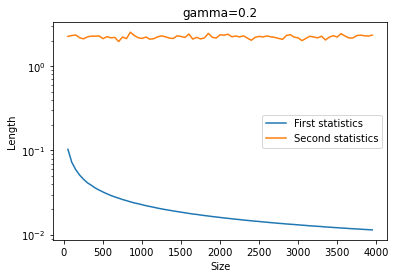

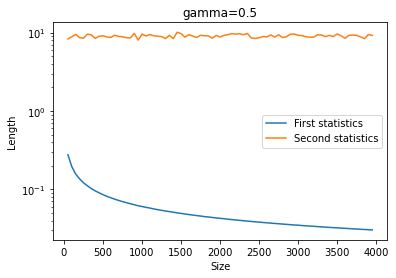

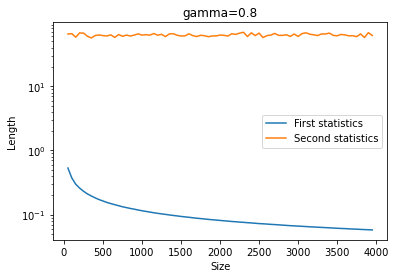

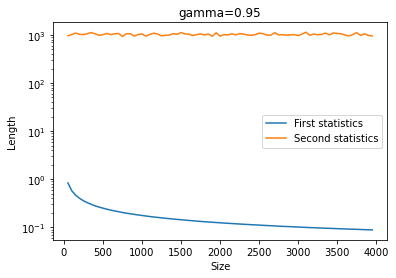

In [83]:
for gamma in gammas:
    plot(ns, exps, gamma)

первый вариант явно получается лучше.